# conduct analysis 

## 1. initial imports

In [5]:
import polars as pl
import polars.selectors as cs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#sklearn
from sklearn.metrics import RocCurveDisplay,  confusion_matrix, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## In this  model we will be fitting a Random forest  model using the data  created metrics from the last lab.

In [6]:
# List of columns to drop (not used as features or targets)
(drop_cols := [
    'LAKE_NAME',
    'latitude',
    'longitude',
    'Monit_MAP_CODE1',
    'Year'
])

['LAKE_NAME', 'latitude', 'longitude', 'Monit_MAP_CODE1', 'Year']

In [7]:
# Load the dataset and drop unwanted columns
(data := pl.read_csv(
    'data/water_quality_and_parcel_summaries_2004_to_2015.csv',
    infer_schema_length=10000
)
.drop(drop_cols)
)

mean_TOTAL_TAX,mean_SALE_VALUE,mean_FIN_SQ_FT,mean_ACRES_DEED,pct_garage_yes,homestead_y_count,homestead_n_count,GREEN_ACRE_y_count,GREEN_ACRE_n_count,avg_secchi_depth,avg_total_phosphorus
f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64
2511.990432,85214.211251,0.0,0.0,NaN,1800,813,63,2550,0.705,0.199
820.433675,169311.453697,1284.034357,0.476291,66.666667,3328,1061,8,699,2.364286,0.046714
3612.712142,207885.570259,1335.454297,0.203411,87.858117,637,94,0,733,2.629412,0.024824
2250.115794,199070.782324,1029.328969,1.075806,66.85761,1548,885,31,2413,1.98625,0.037313
1632.563665,116258.10559,1151.194099,16.295776,69.254658,516,128,65,579,1.936364,0.109091
…,…,…,…,…,…,…,…,…,…,…
1199.895512,212105.022103,1699.357669,0.197515,99.350649,1180,237,18,1403,0.794167,0.115083
0.0,142151.199438,1590.103933,0.0,100.0,610,100,34,676,3.28125,0.015875
0.0,116348.852319,919.500119,0.0,100.0,2477,1720,4,4193,1.6,0.02636


##  2. separating the data

In [8]:

# Define the features(metrics) and the targets(lake quality metrics: secchi depth and total phosphorus)


feature_cols = [col for col in data.columns if col not in ['avg_secchi_depth', 'avg_total_phosphorus']] # this essentially just creates a list  of all columns except for secchi depth and phosphorus
target_cols = ['avg_secchi_depth', 'avg_total_phosphorus']

# Randomly split into training (70%) and validation (30%)
np.random.seed(5021)  # reproducibility
mask = np.random.rand(data.height) < 0.7  

# set  up training  data
training_features = data.filter(mask).select(feature_cols).to_pandas()
training_targets = data.filter(mask).select(target_cols).to_pandas()

# set up validation data
validation_features = data.filter(~mask).select(feature_cols).to_pandas()
validation_targets = data.filter(~mask).select(target_cols).to_pandas()

## 3. find the best model.

In [9]:
# define the various  parameters  our grid search will use.
# This will be used  to make the model go  through every possible combination of these parameters that I specified.
#  this is an overly  simplified  selection as I didn't want this to run for  too long.

param_grid_cart = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [200,400],
    'max_depth': [None, 2, 3, 4, 5],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]    
}

In [10]:
# in this  section we will devide the data within the training set into 10 different groups
# Create the decision tree and random forest models  that we wil l be using.
# The model will  then sequentially train itself across 9 of these groups and test on the 10th group in each iteration of a loop.
# When every combination of  the 10  loops has been gone through, so each group has been used as a test group
# at  this point the model will then have an average accuracy score which can be used to compare the two models to each other.

# set up the folds.
cv_obj = KFold(n_splits=10, shuffle=True, random_state=5021)


# set up  the models
cart_grid = GridSearchCV(DecisionTreeRegressor(), param_grid_cart, verbose=3, cv=cv_obj)
forest_grid = GridSearchCV(RandomForestRegressor(), param_grid_forest, verbose=3, cv=cv_obj)

 # fit the models
cart_grid.fit(training_features, training_targets)
forest_grid.fit(training_features, training_targets)



Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.286 total time=   0.0s
[CV 2/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.046 total time=   0.0s
[CV 3/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.228 total time=   0.0s
[CV 4/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.257 total time=   0.0s
[CV 5/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.033 total time=   0.0s
[CV 6/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.475 total time=   0.0s
[CV 7/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.197 total time=   0.0s
[CV 8/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.141 total time=   0.0s
[CV 9/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.185 total time=   0.0s
[CV 10/10

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [200, 400]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


## 4. examine differences between each model.
perform grid search for finding the best  model. 
 - the training data  will be used.

In [11]:
# was my random forest model better than my decision tree model?
# asks the question, was the random  forest better than the decision tree? 
forest_grid.best_score_ > cart_grid.best_score_

True

### Evaluate the models using the  data  the models trained on.


In [12]:
# Random forest explains 90% of my training data variance. 
y_forest_test_pred = forest_grid.predict(training_features)

{'R^2': explained_variance_score(training_targets, y_forest_test_pred),
 'MSE': mean_squared_error(training_targets, y_forest_test_pred),
 'MAE': mean_absolute_error(training_targets, y_forest_test_pred),
}

{'R^2': 0.9474161251364017,
 'MSE': 0.023813587502152237,
 'MAE': 0.08461095642393814}

In [13]:
# Decision tree explains 60% of my training data variance,
y_cart_test_pred = cart_grid.predict(training_features)

{'R^2': explained_variance_score(training_targets, y_cart_test_pred),
 'MSE': mean_squared_error(training_targets, y_cart_test_pred),
 'MAE': mean_absolute_error(training_targets, y_cart_test_pred),
}


{'R^2': 0.5923266746361776,
 'MSE': 0.178099800583552,
 'MAE': 0.23223048102721025}

### the FINAL test to see how good the model  is.


In [16]:
# The random forest model performance on validation data explains a 67% of  the overall variance.
y_forest_test_pred = forest_grid.predict(validation_features)

{'R^2': explained_variance_score(validation_targets, y_forest_test_pred),
 'MSE': mean_squared_error(validation_targets, y_forest_test_pred),
 'MAE': mean_absolute_error(validation_targets, y_forest_test_pred),
}


{'R^2': 0.6759895488012734,
 'MSE': 0.1876279559446949,
 'MAE': 0.22796892077244027}

# Residual Plot

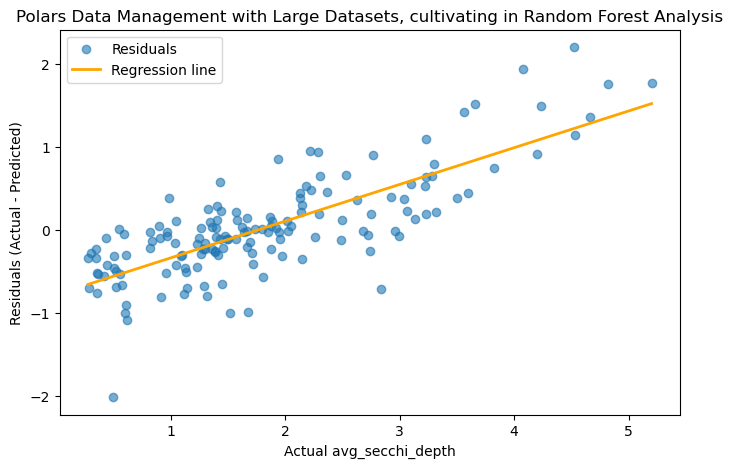

In [18]:
# Plot 9: Residuals vs Actual Values for avg_secchi_depth (with regression line, no grid, no zero line)
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals for avg_secchi_depth
actual = validation_targets['avg_secchi_depth']
predicted = y_forest_test_pred[:, 0] if len(y_forest_test_pred.shape) > 1 else y_forest_test_pred
residuals = actual - predicted

plt.figure(figsize=(8, 5))
plt.scatter(actual, residuals, alpha=0.6, label='Residuals')

# Regression line
z = np.polyfit(actual, residuals, 1)
p = np.poly1d(z)
plt.plot(np.sort(actual), p(np.sort(actual)), color='orange', linewidth=2, label='Regression line')

plt.xlabel('Actual avg_secchi_depth')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Polars Data Management with Large Datasets, cultivating in Random Forest Analysis')
plt.legend()
plt.show()

## 5. summary of model results and water quality insights

Based on the outputs from section 4, we observe that the Random Forest model consistently achieves a higher $R^2$ value and lower mean squared error (MSE) and mean absolute error (MAE) compared to the Decision Tree (CART) model. This indicates that the Random Forest is better at capturing the relationships in our data and provides more accurate predictions for both average Secchi depth and average total phosphorus.

In terms of water quality, this means that the Random Forest model is more effective at explaining and predicting the variation in these key indicators. Secchi depth is a measure of water clarity, and total phosphorus is a critical nutrient influencing lake health. By using the Random Forest model, we can more reliably estimate these water quality metrics based on the available parcel and environmental features, which can help inform lake management and policy decisions.

Overall, the results suggest that with the data we have, roughly 65% of lake health can be  explained.